In [1]:
import re

In [3]:
my_string="Hello there ! How are you doing? This is a simple test. Let see how it works."

In [5]:
#1. Match the sentence endinf [periods,exclamation or question marks]

sentence_endings=r"[.?!]"

In [9]:
# Split my_string on sentence endings and print the result

print("Split on Sentence Endings:")
print(re.split(sentence_endings,my_string))


Split on Sentence Endings:
['Hello there ', ' How are you doing', ' This is a simple test', ' Let see how it works', '']


In [11]:
#Find all the capitalized words in my_string

capitalized_words=r"[A-Z]\w+"
print("Capitalized Words:")
print(re.findall(capitalized_words,my_string))


Capitalized Words:
['Hello', 'How', 'This', 'Let']


In [13]:
#Split the string on space and print

spaces=r"\s+"
print("Split on Spaces")
print(re.split(spaces,my_string))

Split on Spaces
['Hello', 'there', '!', 'How', 'are', 'you', 'doing?', 'This', 'is', 'a', 'simple', 'test.', 'Let', 'see', 'how', 'it', 'works.']


In [19]:
#Tokenization
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

nltk.download("punkt")

scene_one ="This is first sentence. Here's the second sentence! Is this a third one? The fourth sentence follows."

# Split the scene into sentence 

sentences=sent_tokenize(scene_one)
print(sentences)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['This is first sentence.', "Here's the second sentence!", 'Is this a third one?', 'The fourth sentence follows.']


In [21]:
tokenized_sentence=word_tokenize(sentences[3])
print(tokenized_sentence)

['The', 'fourth', 'sentence', 'follows', '.']


In [23]:
unique_tokens=set(word_tokenize(scene_one))
print(unique_tokens)

{'is', 'follows', 'third', 'This', 'the', '?', 'Here', 'The', 'first', 'a', 'sentence', 'one', '.', '!', 'second', "'s", 'fourth', 'this', 'Is'}


In [25]:
# I want to search the word 'second' in the string 


match =re.search("second",scene_one)

print(match.start(),match.end())

35 41


In [29]:
import nltk
from nltk.tokenize import word_tokenize,regexp_tokenize

german_text = "Ich liebe programmieren! 🖥️ Es ist sehr spannend. 👍 Let's go! 🚀"

all_words=word_tokenize(german_text)
print("All Words:")
print(all_words)

All Words:
['Ich', 'liebe', 'programmieren', '!', '🖥️', 'Es', 'ist', 'sehr', 'spannend', '.', '👍', 'Let', "'s", 'go', '!', '🚀']


In [31]:
# Tokenize and print only capital words (including German characters like 'Ü')
capital_words = r"[A-ZÜ]\w+"  # Matches words starting with an uppercase letter (including German umlauts)
print("\nCapital words:")
print(regexp_tokenize(german_text, capital_words))


Capital words:
['Ich', 'Es', 'Let']


In [33]:
# Tokenize and print only emojis
emoji = r"[\U0001F300-\U0001F5FF|\U0001F600-\U0001F64F|\U0001F680-\U0001F6FF|\u2600-\u26FF\u2700-\u27BF]"  # Emoji Unicode ranges
print("\nEmojis:")
print(regexp_tokenize(german_text, emoji))


Emojis:
['🖥', '👍', '🚀']


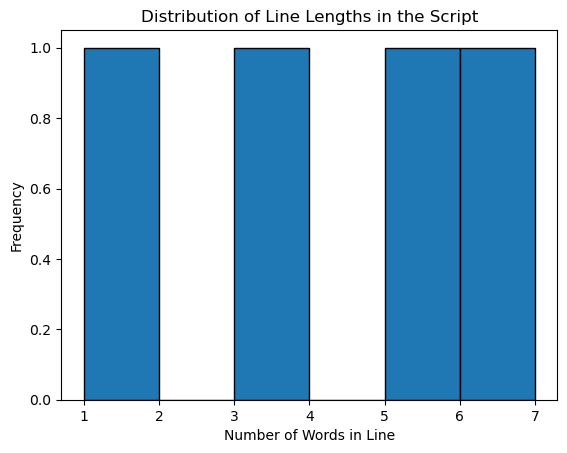

In [40]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import regexp_tokenize

# Example script from the "Holy Grail" (replace with your own script)
holy_grail = """KING ARTHUR:  We are the knights who say Ni!
PATSY:  Ni!
KING ARTHUR:  We seek the Holy Grail!
SIR LANCELOT:  The Holy Grail?"""

# Split the script into lines
lines = holy_grail.split('\n')

# Replace all speaker lines using regex
pattern = r"[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"  # Matches speaker names (uppercase letters followed by a colon)
lines = [re.sub(pattern, '', l) for l in lines]

# Tokenize each line
tokenized_lines = [regexp_tokenize(s, r"\w+") for s in lines]

# Make a frequency list of lengths (number of words in each line)
line_num_words = [len(t_line) for t_line in tokenized_lines]

# Plot a histogram of the line lengths
plt.hist(line_num_words, bins=range(1, max(line_num_words) + 1), edgecolor='black')

# Add titles and labels
plt.title("Distribution of Line Lengths in the Script")
plt.xlabel("Number of Words in Line")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [42]:
# 1. [A-Z]{2,}
# [A-Z]: This matches any uppercase letter from A to Z.

# {2,}: This quantifier specifies that the preceding pattern (uppercase letter) must appear at least 2 times. This ensures that only speaker names with two or more uppercase letters are matched (for example, "KING" but not "A").

# 2. (\s)?
# \s: This matches any whitespace character (spaces, tabs, or newlines).

# ?: The question mark after (\s) makes the whitespace optional. It means that there could be zero or one space after the speaker’s name before the colon. So, it matches both cases with or without a space after the name.

# 3. (#\d)?
# #: Matches the literal character #.

# \d: Matches any digit (0-9).

# ?: The question mark makes this entire part optional. So, it will match a hashtag followed by a number, such as #1, but it's not required for the match. This is useful in scripts where speaker names may optionally have a number (e.g., "KING ARTHUR #1").

# 4. ([A-Z]{2,})?
# [A-Z]{2,}: This part again matches two or more uppercase letters (a speaker's name).

# ?: The question mark makes this entire part optional. It allows for cases where the speaker's name could consist of just one group of uppercase letters (without a second set of uppercase letters after a space or number). This handles cases where the name is followed by only one word (e.g., "KING ARTHUR") but might also match something like "KING ARTHUR THE GREAT".

# 5. :
# The literal colon : at the end ensures that this pattern matches a speaker's name followed by a colon, which is common in scripts (e.g., KING ARTHUR:).

# Summary of Pattern:
# This regular expression is designed to match the following formats:

# A speaker's name in uppercase with at least two letters, followed by:

# Optionally a space,

# Optionally a hashtag and a number (e.g., #1),

# Optionally more uppercase letters (e.g., for extended names or titles),

# Ending with a colon.

# Examples of Matches:
# KING ARTHUR:

# KING ARTHUR #1:

# LADY GUINEVERE:

# SIR LANCELOT #2:

# Non-matching Examples:
# king arthur: (lowercase letters won't match).

# AR:

# K:

In [44]:

# Splitting the Script into Lines:

# lines = holy_grail.split('\n')
# This line splits the entire script of "holy_grail" into individual lines using the newline character ('\n'). This creates a list called lines, where each element is a line from the script.

# Replacing Speaker Prompts:

# pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
# lines = [re.sub(pattern, '', l) for l in lines]
# Here, a regular expression pattern is defined to match speaker prompts like "ARTHUR:" or "SOLDIER #1:". The pattern looks for uppercase letters, optionally followed by a space and a number, and ending with a colon. The re.sub() function is used within a list comprehension to replace these prompts with an empty string in each line. This effectively removes the speaker names from the script lines.

# Tokenizing Each Line:

# tokenized_lines = [regexp_tokenize(s, "\w+") for s in lines]
# This line uses a list comprehension to tokenize each line in lines. The regexp_tokenize() function is used with the pattern "\w+", which matches sequences of word characters (letters, digits, and underscores). This results in a list of lists, where each inner list contains the words from a line.

# Creating a List of Line Lengths:

# line_num_words = [len(t_line) for t_line in tokenized_lines]
# Another list comprehension is used here to calculate the number of words in each tokenized line. The len() function is applied to each list of tokens (t_line) to get the count of words, resulting in a list called line_num_words that contains the length of each line in terms of word count.

# Plotting a Histogram:

# plt.hist(line_num_words)
# plt.show()
# Finally, a histogram of the line lengths is plotted using plt.hist(), which takes line_num_words as input. The plt.show() function is called to display the plot. This visualizes the distribution of




In [49]:
from collections import Counter
from nltk.tokenize import word_tokenize

text="The cat sat on the mat. The cat is in the box."

# Tokenize the text 
tokens=word_tokenize(text)

# COunters 
token_counts=Counter(tokens)

print(token_counts)

most_common_tokens=token_counts.most_common(2)
print("2 most common tokens", most_common_tokens)

Counter({'The': 2, 'cat': 2, 'the': 2, '.': 2, 'sat': 1, 'on': 1, 'mat': 1, 'is': 1, 'in': 1, 'box': 1})
2 most common tokens [('The', 2), ('cat', 2)]


In [61]:
# Stop words 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')

# Example feedback text
feedback = "I reached out to support and got a helpful response within minutes!!! Very #impressed"

tokens= word_tokenize(feedback)
print("Tokens:",tokens)
stop_words=stopwords.words('english')
# print("Stop Words:",stop_words)

# Remove the stop words
filtered_tokens= [word for word in tokens if word.lower() not in stop_words]

print("Filtered:",filtered_tokens)



Tokens: ['I', 'reached', 'out', 'to', 'support', 'and', 'got', 'a', 'helpful', 'response', 'within', 'minutes', '!', '!', '!', 'Very', '#', 'impressed']
Filtered: ['reached', 'support', 'got', 'helpful', 'response', 'within', 'minutes', '!', '!', '!', '#', 'impressed']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
# Removing Punctuations 

import string

filtered_tokens = ['reached', 'support', 'got', 'helpful', 'response', 'within', 'minutes', '!', '!', '!', '#', 'impressed']

clean_tokens= [word for word in filtered_tokens if word not in string.punctuation]

print(clean_tokens)

['reached', 'support', 'got', 'helpful', 'response', 'within', 'minutes', 'impressed']


In [71]:
review = "I have been FLYING a lot lately and the Flights just keep getting DELAYED. Honestly, traveling for WORK gets exhausting with endless delays, but every trip teaches you something new!"

In [73]:
# Lowercase the review
lower_text = review.lower()
# Tokenize the lower_text into words
tokens = word_tokenize(lower_text)
# Remove stop words and punctuation
clean_tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]

print(clean_tokens)

['flying', 'lot', 'lately', 'flights', 'keep', 'getting', 'delayed', 'honestly', 'traveling', 'work', 'gets', 'exhausting', 'endless', 'delays', 'every', 'trip', 'teaches', 'something', 'new']


In [77]:
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

stemmed_tokens=[stemmer.stem(word) for word in clean_tokens]

print(stemmed_tokens)

['fli', 'lot', 'late', 'flight', 'keep', 'get', 'delay', 'honestli', 'travel', 'work', 'get', 'exhaust', 'endless', 'delay', 'everi', 'trip', 'teach', 'someth', 'new']


In [81]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...


True

In [83]:
lemmetizer=WordNetLemmatizer()

lemmatized_tokens=[lemmetizer.lemmatize(word) for word in clean_tokens]

print(lemmatized_tokens)

['flying', 'lot', 'lately', 'flight', 'keep', 'getting', 'delayed', 'honestly', 'traveling', 'work', 'get', 'exhausting', 'endless', 'delay', 'every', 'trip', 'teach', 'something', 'new']


In [85]:
lemmatized_tokens_v=[lemmetizer.lemmatize(word,pos='v') for word in clean_tokens]
print(lemmatized_tokens_v)

['fly', 'lot', 'lately', 'flight', 'keep', 'get', 'delay', 'honestly', 'travel', 'work', 'get', 'exhaust', 'endless', 'delay', 'every', 'trip', 'teach', 'something', 'new']


In [90]:
#Bag of Words 



In [106]:
def preprocess(text):
    #Lowercase, Tokenize and Remove Punctuations
    text=text.lower()
    tokens= word_tokenize(text)
    tokens= [word for word in tokens if word.isalpha()]
    return " ".join(tokens)
    

In [108]:
reviews = [
    "The product is fantastic! It works like a charm.",
    "I hated the product. It broke after one use.",
    "Product was okay, not the best, but fine overall."
]

In [110]:
cleaned_reviews=[preprocess(review) for review in reviews]

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer()

vectorizer.fit(cleaned_reviews)

print(vectorizer.get_feature_names_out())

['after' 'best' 'broke' 'but' 'charm' 'fantastic' 'fine' 'hated' 'is' 'it'
 'like' 'not' 'okay' 'one' 'overall' 'product' 'the' 'use' 'was' 'works']


In [116]:
bow_matrix=vectorizer.transform(cleaned_reviews)

In [120]:
print(bow_matrix.toarray())

[[0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1]
 [1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0]]


In [122]:
X=vectorizer.fit_transform(cleaned_reviews)

In [124]:
X

<3x20 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [126]:
import numpy as np

word_counts=np.sum(X.toarray(),axis=0)

In [128]:

words=vectorizer.get_feature_names_out()



In [130]:
# Function to get top ten words with their frequencies
def get_top_ten(words, word_counts):
    # Get the indices of the top 10 words based on frequency
    top_indices = np.argsort(word_counts)[::-1][:10]
    top_words = [words[i] for i in top_indices]
    top_counts = word_counts[top_indices]
    return top_words, top_counts

In [132]:
# Get the top 10 words and their counts
top_words_with_stopwords, top_counts_with_stopwords = get_top_ten(words, word_counts)

# Print the top words and their frequencies
print(top_words_with_stopwords)
print(top_counts_with_stopwords)

['the', 'product', 'it', 'is', 'best', 'broke', 'but', 'charm', 'fantastic', 'fine']
[3 3 2 1 1 1 1 1 1 1]


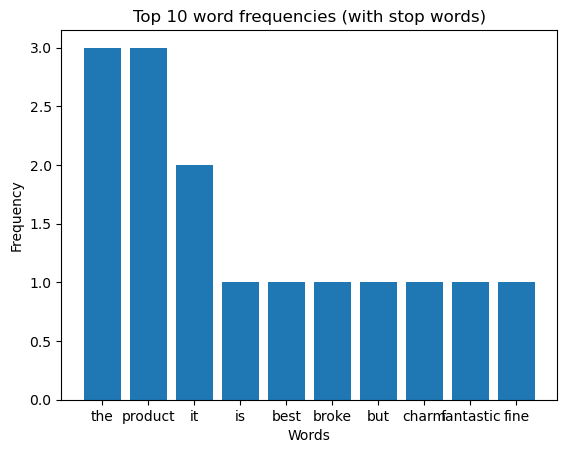

In [134]:
import matplotlib.pyplot as plt
# Plot the frequencies with stop words
plt.bar(top_words_with_stopwords, top_counts_with_stopwords)
plt.title("Top 10 word frequencies (with stop words)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [136]:
# Term Frequency - Inverse Document Frequency 


reviews = ["The smart speaker is incredible. Clear sound and fast responses!",
           "I am disappointed with the smart bulb. It stopped working in a week.",
           "The thermostat is okay. Not too smart, but functional."]

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer
cleaned_reviews=[preprocess(review) for review in reviews]

In [142]:
vectorizer=TfidfVectorizer()

tfidf_matrix=vectorizer.fit_transform(cleaned_reviews)

In [144]:
tfidf_matrix

<3x25 sparse matrix of type '<class 'numpy.float64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [146]:
import pandas as pd

In [148]:
df=pd.DataFrame(tfidf_matrix.toarray(),columns=vectorizer.get_feature_names_out())

In [150]:
print(df.head())

         am       and      bulb       but     clear  disappointed      fast  \
0  0.000000  0.347607  0.000000  0.000000  0.347607      0.000000  0.347607   
1  0.321119  0.000000  0.321119  0.000000  0.000000      0.321119  0.000000   
2  0.000000  0.000000  0.000000  0.370725  0.000000      0.000000  0.000000   

   functional        in  incredible  ...     smart     sound   speaker  \
0    0.000000  0.000000    0.347607  ...  0.205302  0.347607  0.347607   
1    0.000000  0.321119    0.000000  ...  0.189658  0.000000  0.000000   
2    0.370725  0.000000    0.000000  ...  0.218956  0.000000  0.000000   

    stopped       the  thermostat       too      week      with   working  
0  0.000000  0.205302    0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.321119  0.189658    0.000000  0.000000  0.321119  0.321119  0.321119  
2  0.000000  0.218956    0.370725  0.370725  0.000000  0.000000  0.000000  

[3 rows x 25 columns]


In [152]:
import gensim.downloader as api

ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\VICTUS\anaconda36\Lib\site-packages\scipy\linalg\__init__.py)

In [154]:
!pip install gensim

In [156]:
!pip install scipy

In [158]:
import gensim.downloader as api

ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\VICTUS\anaconda36\Lib\site-packages\scipy\linalg\__init__.py)